E:\Python\Machine Learning\knn_minkowski_dist
   1: .ipynb_checkpoints
   2: backup_2-19-24
   3: backup_2_23_24
   4: dataset.csv
   5: minkowski_dist.ipynb
   6: test


Type the line number for the dataset file as seen above:  4


E:\Python\Machine Learning\knn_minkowski_dist\dataset.csv


,Name,Age,Gender,Class of Sport
0,Goku,32,0,Football
1,James Bond,40,0,Neither
2,Nabeer Dar,16,1,Cricket


Enter the value for the first attribute:  45
Enter the value for the second attribute:  0
Choose the column name for the categorical data:  Class of Sport


class of sports:  {'Unknown': 'Orange', 'Football': 'red', 'Neither': 'green', 'Cricket': 'blue'}


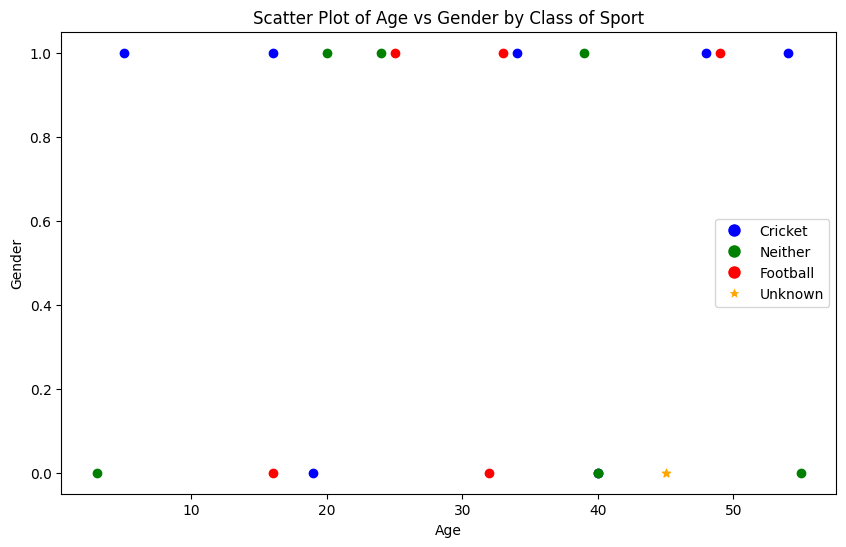

distances:  [(13.0, 'Football'), (5.0, 'Neither'), (30.0, 'Cricket'), (12.0, 'Cricket'), (10.0, 'Neither'), (5.0, 'Cricket'), (26.0, 'Neither'), (22.0, 'Neither'), (4.0, 'Cricket'), (13.0, 'Football'), (21.0, 'Football'), (10.0, 'Cricket'), (42.0, 'Neither'), (5.0, 'Neither'), (41.0, 'Cricket'), (26.0, 'Cricket'), (5.0, 'Football'), (29.0, 'Football'), (7.0, 'Neither')]


Enter k value:  5


nearest distances:  [(4.0, 'Cricket'), (5.0, 'Cricket'), (5.0, 'Football'), (5.0, 'Neither'), (5.0, 'Neither')]
-------------------------Test--------------------------
predicted_class:  ['Cricket']


In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# Import the 'operator' module, which provides functions for common operations like sorting.
import operator

def get_local_dir():
    local_directory = os.getcwd()
    return local_directory


def get_local_files(local_directory):
    files_list = os.listdir(local_directory)
    return files_list

def display_local_dir(files_list):
    print(get_local_dir())
    file_selection_counter = 1
    for file in files_list:
        tabed_file = "\t"+  f"{file_selection_counter}: " + file
        print(tabed_file.expandtabs(3))
        file_selection_counter += 1

def is_file_csv(selected_file):
    if len(selected_file) > 4:
        if (selected_file[-4:-1]+selected_file[-1]) == ".csv":
            return False
        return True
    return True

def select_file(files_list):
    counter = 0
    file_not_found = True
    while (file_not_found):
        if counter == 0:
            selected_file_number = int(input("Type the line number for the dataset file as seen above: "))
            selected_file = f"{files_list[selected_file_number - 1]}"
            file_not_found = is_file_csv(selected_file)
            if file_not_found == True:
                counter = 1
        else:
            selected_file_number = int(input("Type the line number again, it was not valid CSV File: "))
            selected_file = f"{files_list[selected_file_number - 1]}"
            file_not_found = is_file_csv(selected_file)
            
    return selected_file

def get_categorical_attribute_index(dataset):
    attribute_name = input("Choose the column name for the categorical data: ")
    attribute_index = 0
    for column in dataset.columns:
        if column == attribute_name:
            break
        else:
            attribute_index += 1
    return attribute_index

def show_datapoints(col_index, dataset, datapoints):
    colors_ = [
    "red", "green", "blue", "yellow",
    "purple", "pink", "brown", "black", "white",
    "gray", "cyan", "magenta", "lime", "maroon",
    "olive", "navy", "teal", "silver", "gold"
    ]

    class_of_sport_colors= {'Unknown': 'Orange'}
    colors_list_counter=0
    for index, row in dataset.iterrows():
        if row.iloc[col_index] not in class_of_sport_colors:
            class_of_sport_colors.update({row.iloc[col_index]: colors_[colors_list_counter]})
            colors_list_counter += 1    
  

    plt.figure(figsize=(10, 6))
    
    for index, row in dataset.iterrows():
        plt.scatter(row['Age'], row['Gender'], color=class_of_sport_colors[row.iloc[col_index]])
    
    plt.scatter(datapoints[0], datapoints[1], color=class_of_sport_colors['Unknown'], marker = '*')
    
    plt.xlabel('Age')
    plt.ylabel('Gender')
    plt.title('Scatter Plot of Age vs Gender by Class of Sport')
    
    from matplotlib.lines import Line2D
    
    print("class of sports: ", class_of_sport_colors)
    legend_elements = []
    index = 0
    for class_, color_ in class_of_sport_colors.items():
        if index == 0:
            legend_elements.append(Line2D([0], [0], marker='*', color='w', label=class_,
                   markerfacecolor=color_, markersize=10))
        else:
            legend_elements.append(Line2D([0], [0], marker='o', color='w', label=class_,
                   markerfacecolor=color_, markersize=10))
        index = index + 1
    legend_elements.reverse()
        
    plt.legend(handles=legend_elements)
    plt.show()

def calculate_minkowski_dist(col_index, dataset, points, p):
    minkowski_distances_list = []
    for index, row in dataset.iterrows():
        class_category = row.iloc[col_index]
        minkowski_distance_segment = (abs(points[0] - row.iloc[1]) ** p + abs(int(points[1]) - int(row.iloc[2])) ** p) ** 1/p
        minkowski_distances_list.append((minkowski_distance_segment, class_category))
    return minkowski_distances_list

def nearest_distances(k: int, distances):
    closest_distances = sorted(distances)
    closest_k_distances = sorted(closest_distances[0: k], reverse = False)
    return closest_k_distances

def calculate_class_count(nearest_classes):
    class_count_dict = {}
    for nearest_class in nearest_classes:
        print(nearest_class)
        if nearest_class[0] in class_count_dict:
            current_class_count = class_count_dict[nearest_class[1]]
            class_count_dict.update({nearest_class[1]: current_class_count + 1})
        else:
            class_count_dict.update({nearest_class[1]: 1})
    return class_count_dict

def predict_class(nearest_classes):
    # sorts the classes by closest minkowski distance
    highest_count_classes = []
    nearest_values = []
    nearest_value = 0
    nearest_class = [None]
    # index = 0
    for index, touple in enumerate(nearest_classes):
        if index == 0:
            print("-------------------------Test--------------------------")
            first_distant_neighbour = nearest_classes[0]
            nearest_value = int(first_distant_neighbour[0])
            
            nearest_class[0] = first_distant_neighbour[1]
        if nearest_class[0] == touple[1]:
            pass
        else:
            if nearest_value == touple[0]:
                nearest_class.append(touple[1])
    return nearest_class

def knn(dataset, datapoints):
    # display(dataset)
    col_index = get_categorical_attribute_index(dataset)
    show_datapoints(col_index, dataset, datapoints)
    distances = calculate_minkowski_dist(col_index, dataset, datapoints, 1)
    print("distances: ", distances)
    
    k = int(input("Enter k value: "))
    nearest_classes = nearest_distances(k, distances)
    print("nearest distances: ", nearest_classes)

    # class_counts = calculate_class_count(nearest_classes)

    predicted_class = predict_class(nearest_classes)
    print("predicted_class: ", predicted_class)
   


if __name__ == '__main__':

    local_directory = get_local_dir()
    
    files_list = get_local_files(local_directory)
    
    display_local_dir(files_list)
    
    selected_file = select_file(files_list)
    
    
    path = local_directory + "\\" + f"{selected_file}"
    print(path)

    df = pd.read_csv("E:\Python\Machine Learning\knn_minkowski_dist\dataset.csv")

    #display file
    display(df.head(3))

    point1 = int(input("Enter the value for the first attribute: "))
    point2 = int(input("Enter the value for the second attribute: "))
    datapoints = (point1, point2)

    
    knn(df, datapoints)
    
       


##### 